In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, accuracy_score, f1_score,recall_score,confusion_matrix
from sklearn.linear_model import Ridge,Lasso
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [2]:
data_train=pd.read_csv(r"C:\Users\1403330\Downloads\New Travel Insurance\train.csv")
data_train.head()
data_train.shape

(50553, 12)

In [3]:
data_test=pd.read_csv(r"C:\Users\1403330\Downloads\New Travel Insurance\test.csv")
data_test.head()
data_test.shape

(12661, 11)

In [4]:
data_train.drop(["Gender","Commision (in value)"],1,inplace=True)
data_test.drop(["Gender","Commision (in value)"],1,inplace=True)


In [5]:
data_train.describe()

,ID,Claim,Duration,Net Sales,Age
count,50553.000000,50553.000000,50553.000000,50553.000000,50553.000000
mean,31679.740134,0.014658,49.425969,40.800977,40.011236
std,18288.265350,0.120180,101.434647,48.899683,14.076566
min,0.000000,0.000000,-2.000000,-389.000000,0.000000
25%,15891.000000,0.000000,9.000000,18.000000,35.000000
50%,31657.000000,0.000000,22.000000,26.500000,36.000000
75%,47547.000000,0.000000,53.000000,48.000000,44.000000
max,63325.000000,1.000000,4881.000000,810.000000,118.000000


In [6]:
indexnames=data_train[data_train["Duration"]>=400].index
data_train.drop(indexnames,inplace=True)
indexnames=data_train[data_train["Duration"]<=0.99].index
data_train.drop(indexnames,inplace=True)
indexnames=data_train[data_train["Net Sales"]<1].index
data_train.drop(indexnames,inplace=True)
indexnames=data_train[data_train["Age"]>=100].index
data_train.drop(indexnames,inplace=True)
indexnames=data_train[data_train["Age"]<=0].index
data_train.drop(indexnames,inplace=True)

In [7]:
data_train.describe()

,ID,Claim,Duration,Net Sales,Age
count,47464.000000,47464.000000,47464.000000,47464.000000,47464.000000
mean,31590.407214,0.015254,47.199140,42.562102,38.738307
std,18289.199138,0.122561,71.541807,46.847934,10.096311
min,22.000000,0.000000,1.000000,1.030000,1.000000
25%,15792.750000,0.000000,9.000000,19.800000,35.000000
50%,31472.500000,0.000000,22.000000,27.000000,36.000000
75%,47494.250000,0.000000,52.000000,49.500000,42.000000
max,63325.000000,1.000000,399.000000,682.000000,88.000000


In [8]:
data_train.skew()

ID           0.010041
Claim        7.910591
Duration     3.178388
Net Sales    3.788608
Age          1.224221
dtype: float64

In [9]:
data_train["Duration"]=np.log1p(data_train["Duration"])
data_train["Duration"].skew()
data_train["Net Sales"]=np.log(data_train["Net Sales"])
data_train["Net Sales"].skew()
data_train["Age"]=np.cbrt(data_train["Age"])
data_train["Age"].skew()

0.5083598419774623

In [10]:
data_train.skew()

ID           0.010041
Claim        7.910591
Duration     0.237361
Net Sales    0.365295
Age          0.508360
dtype: float64

In [11]:
data_test.shape

(12661, 9)

(array([5.000e+00, 4.000e+00, 1.200e+01, 2.400e+01, 3.000e+02, 4.618e+03,
        2.894e+04, 8.851e+03, 4.111e+03, 5.990e+02]),
 array([1.        , 1.34479602, 1.68959204, 2.03438805, 2.37918407,
        2.72398009, 3.06877611, 3.41357213, 3.75836814, 4.10316416,
        4.44796018]),
 <a list of 10 Patch objects>)

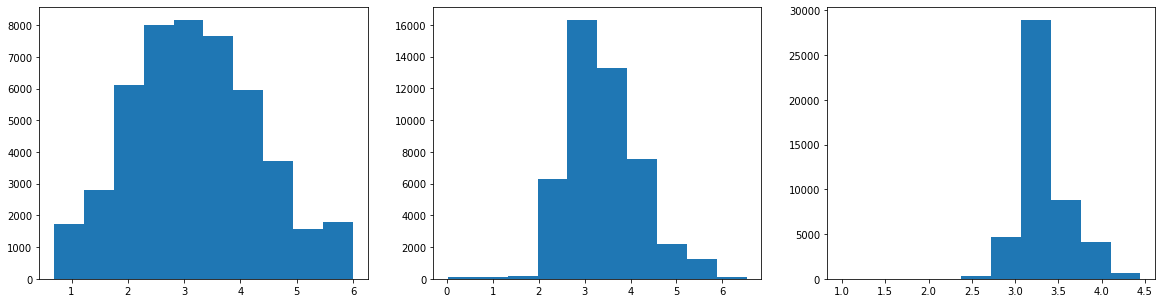

In [12]:
import matplotlib.pyplot as plt
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize = (20,5))
ax1.hist(data_train["Duration"])
ax2.hist(data_train["Net Sales"])
ax3.hist(data_train["Age"])

In [13]:
label_encoder=LabelEncoder()
data_train["Agency Type"]=label_encoder.fit_transform(data_train["Agency Type"])
data_train["Agency"]=label_encoder.fit_transform(data_train["Agency"])
data_train["Distribution Channel"]=label_encoder.fit_transform(data_train["Distribution Channel"])
data_train["Product Name"]=label_encoder.fit_transform(data_train["Product Name"])
data_train["Destination"]=label_encoder.fit_transform(data_train["Destination"])
data_train.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Age
1,4339,7,1,1,10,0,4.454347,79,4.234107,3.301927
2,34590,6,1,1,16,0,2.484907,56,2.985682,4.217163
3,55816,7,1,1,1,0,2.833213,38,2.995732,3.174802
4,13816,7,1,1,10,0,2.397895,47,2.708050,3.072317
5,50349,6,1,1,16,0,4.174387,88,3.901973,3.301927


In [14]:
data_train.shape

(47464, 10)

In [15]:

label_encoder=LabelEncoder()
data_test["Agency Type"]=label_encoder.fit_transform(data_test["Agency Type"])
data_test["Agency"]=label_encoder.fit_transform(data_test["Agency"])
data_test["Distribution Channel"]=label_encoder.fit_transform(data_test["Distribution Channel"])
data_test["Product Name"]=label_encoder.fit_transform(data_test["Product Name"])
data_test["Destination"]=label_encoder.fit_transform(data_test["Destination"])
data_test.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Age
0,25902,6,1,1,16,58,36,49.5,47
1,19535,7,1,1,1,4,79,20.0,24
2,43717,7,1,1,1,68,100,20.0,36
3,48271,7,1,1,1,41,17,28.0,36
4,52318,7,1,1,10,16,79,11.0,36


In [16]:
data_test.shape

(12661, 9)

In [17]:
X=data_train.drop(["Claim","ID"],1)
y=data_train["Claim"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
model=LogisticRegression(random_state=0,class_weight="balanced")
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy is: ",model.score(X_test,y_test))
print("Precision is: ",precision_score(y_test,y_pred))
print("F1 score is: ",f1_score(y_test,y_pred))
print("Recall score is: ",recall_score(y_test,y_pred))

Accuracy is:  0.7878436742863162
Precision is:  0.0491566265060241
F1 score is:  0.09197475202885483
Recall score is:  0.7132867132867133


In [19]:
scaler=StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [20]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=0)
X_sample4,y_sample4=smote.fit_sample(X_train_scaled,y_train)

In [21]:
model_smote_dt_2=DecisionTreeClassifier(random_state=0,max_depth=5,min_samples_split=2, min_samples_leaf=2,class_weight="balanced") #decision tree rus
model_smote_dt_2.fit(X_sample4,y_sample4)
y_pred=model_smote_dt_2.predict(X_test_scaled)
print("Accuracy score is: ",model_smote_dt_2.score(X_test_scaled,y_test))
print("Recall score is: ",recall_score(y_test,y_pred))
print("Precision score is: ",precision_score(y_test,y_pred))
print("F1 score is: ",f1_score(y_test,y_pred))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred))

Accuracy score is:  0.8397766775518803
Recall score is:  0.6643356643356644
Precision score is:  0.06058673469387755
F1 score is:  0.11104617182933957
Confusion Matrix:  [[7877 1473]
 [  48   95]]


In [22]:
X_train_n = data_train.drop(['Claim'], axis=1)
y_train_n = data_train['Claim'].copy()
X_train_n = X_train_n.drop(['ID'], axis=1)
X_test_n  = data_test.drop(['ID'], axis=1)
X_train_n.shape, y_train_n.shape, X_test_n.shape

((47464, 8), (47464,), (12661, 8))

In [23]:
model_smote_dt_2=DecisionTreeClassifier(random_state=0,max_depth=5,min_samples_split=2, min_samples_leaf=2,class_weight="balanced") #decision tree rus

model_smote_dt_2.fit(X_train_n, y_train_n)
Y_pred = model_smote_dt_2.predict(X_test_n)

In [24]:
submission = pd.DataFrame({"ID": data_test["ID"],"Claim": Y_pred})
submission.to_csv(r'C:\Users\1403330\Downloads\New Travel Insurance\sample_submission.csv', index=False)
